In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import re
sns.set(color_codes=True)

In [2]:
types_dict = {'race_id': str, 'race': str, 'date':str, 'place':str, 'horse_id':str, 'horse_no':str,
              'horse':str, 'jockey':str, 'trainer':str, 'actual_weight':float, 'declared_horse_weight':float,
              'draw':str, 'lbw':float, 'running_position': str,'win_odds':float, 'class':str, 'going':str,
              'track':str, 'prize':int, 'location':str, 'distance_m':int, 'finish_time':str, 'finish_time_s':float}
parse_dates = ['date', 'finish_time']
performance=pd.read_csv('data/performance.csv',dtype=types_dict,parse_dates=parse_dates)

In [3]:
horses = pd.read_csv('data/horses.csv', parse_dates=['arrival_date'])
trainers = pd.read_csv('data/trainers.csv')
trainers_pct = pd.read_csv('data/trainers_pct.csv')
jockeys = pd.read_csv('data/jockeys.csv')
jockeys_pct = pd.read_csv('data/jockeys_pct.csv')

In [4]:
df_h=horses[['horse_id','country_of_origin','age','total_stakes','1-2-3-starts']]
df_h.columns=['horse_id','country_of_origin','age','h_stakes_wins','1-2-3-starts']
df_p_h=pd.merge(performance, df_h,how='left', on='horse_id')

df_t=trainers[['Trainer','Stakes Won']]
df_t.columns=['trainer','t_stakes_won']
df_p_h_t=pd.merge(df_p_h, df_t,how='left', on='trainer')

df_j=jockeys[['Jockey','Stakes Won']]
df_j.columns=['jockey','j_stakes_won']

df_full=pd.merge(df_p_h_t, df_j, how='left', on='jockey')
df_full.place=df_full.place.astype(int)
df_full.race_id=df_full.race_id.astype(int)
df_full

,race_id,race,date,place,horse_id,horse_no,horse,jockey,trainer,actual_weight,...,location,distance_m,finish_time,finish_time_s,country_of_origin,age,h_stakes_wins,1-2-3-starts,t_stakes_won,j_stakes_won
0,1,1,2019-09-01,1,C127,3,GOOD RUNNERS WAY,Z Purton,C S Shum,131.0,...,Sha Tin,1600,1900-01-01 00:01:35.480,95.48,NZ,6.0,1388520.0,"['2', '1', '2', '22']","$69,711,815","$202,112,646"
1,1,1,2019-09-01,2,C035,4,REGENCY GEM,J Moreira,W Y So,129.0,...,Sha Tin,1600,1900-01-01 00:01:35.500,95.50,NZ,6.0,1016240.0,"['1', '2', '2', '19']","$35,330,615","$206,911,366"
2,1,1,2019-09-01,3,V406,7,PROUD SKY,K Teetan,L Ho,121.0,...,Sha Tin,1600,1900-01-01 00:01:35.570,95.57,GB,7.0,1780625.0,"['3', '0', '1', '42']","$21,136,215","$138,503,489"
3,1,1,2019-09-01,4,V369,2,LE PANACHE,A Sanna,D J Whyte,132.0,...,Sha Tin,1600,1900-01-01 00:01:35.680,95.68,IRE,NaN,2501500.0,"['2', '6', '5', '42']","$51,039,432","$10,735,300"
4,1,1,2019-09-01,5,V400,1,GOLD VELVET,L Hewitson,A T Millard,133.0,...,Sha Tin,1600,1900-01-01 00:01:35.710,95.71,NZ,NaN,2005145.0,"['2', '4', '3', '34']","$37,234,605","$7,362,155"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10202,828,9,2020-07-15,8,A177,6,ENCORE BOY,T H So,P F Yiu,120.0,...,Happy Valley,1200,1900-01-01 00:01:09.100,69.10,AUS,7.0,6810850.0,"['5', '5', '7', '35']","$76,092,793","$8,847,788"
10203,828,9,2020-07-15,9,B285,12,RACING FIGHTER,M F Poon,C H Yip,113.0,...,Happy Valley,1200,1900-01-01 00:01:09.240,69.24,NZ,6.0,5479000.0,"['4', '3', '1', '29']","$26,783,461","$39,061,505"
10204,828,9,2020-07-15,10,A379,9,SUNNY BOY,V Borges,J Moore,117.0,...,Happy Valley,1200,1900-01-01 00:01:09.360,69.36,AUS,6.0,2344250.0,"['2', '1', '1', '12']","$115,408,686","$21,600,335"
10205,828,9,2020-07-15,11,A293,8,SAUL'S SPECIAL,K H Chan,C W Chang,110.0,...,Happy Valley,1200,1900-01-01 00:01:09.930,69.93,AUS,7.0,5152950.0,"['4', '2', '1', '37']","$24,558,480","$28,282,138"


In [5]:
df_full.columns

Index(['race_id', 'race', 'date', 'place', 'horse_id', 'horse_no', 'horse',
       'jockey', 'trainer', 'actual_weight', 'declared_horse_weight', 'draw',
       'lbw', 'running_position', 'win_odds', 'class', 'going', 'track',
       'prize', 'location', 'distance_m', 'finish_time', 'finish_time_s',
       'country_of_origin', 'age', 'h_stakes_wins', '1-2-3-starts',
       't_stakes_won', 'j_stakes_won'],
      dtype='object')

### Mean of numbers of race per each horse in last season

In [6]:
df_full.groupby(['horse_id','horse'])['horse_no'].count().mean()

7.203246294989414

### Average win odds for the top horses 

In [7]:
left=df_full.groupby(['horse_id','horse'])[['win_odds','place']].mean()
right=df_full.groupby(['horse_id','horse'])[['horse_no']].count()
right.columns=['num_of_race']
res=left.join(right)
res=res.reset_index()
res

,horse_id,horse,win_odds,place,num_of_race
0,A005,RED ELYSEES,10.961538,5.692308,13
1,A006,ALL YOU NEED,15.000000,7.000000,1
2,A007,BOND ELEGANCE,25.833333,10.000000,6
3,A009,POWERMAX,55.850000,6.500000,6
4,A010,GRADE ONE,15.745455,6.363636,11
...,...,...,...,...,...
1412,V410,SEASONS BLOOM,14.600000,4.750000,4
1413,V412,SUNNY DRAGON,34.000000,9.750000,4
1414,V414,RAICHU,6.250000,4.500000,2
1415,V417,DESTIN,11.145455,4.818182,11


In [8]:
top_horses=res[(res['num_of_race']>3)&(res['place']<=3)].sort_values('place')
place_top_10=top_horses[:10]
place_top_10

,horse_id,horse,win_odds,place,num_of_race
664,C238,GOLDEN SIXTY,2.328571,1.000000,7
1034,D108,SUPER WEALTHY,3.675000,1.250000,4
201,B064,YEE CHEONG PEGASUS,2.900000,1.571429,7
527,C067,MERIDIAN GENIUS,4.680000,1.600000,5
1142,D228,GOOD LUCK FRIEND,5.266667,1.666667,6
225,B101,EXULTANT,1.871429,1.714286,7
56,A157,BIG TIME BABY,28.285714,1.857143,7
1401,V380,BEAUTY GENERATION,1.925000,2.000000,8
1199,D298,CHEVALIER PRINCE,13.400000,2.000000,4
1178,D270,CHANCHENG PRINCE,7.360000,2.000000,5


Text(0, 0.5, 'Horse name')

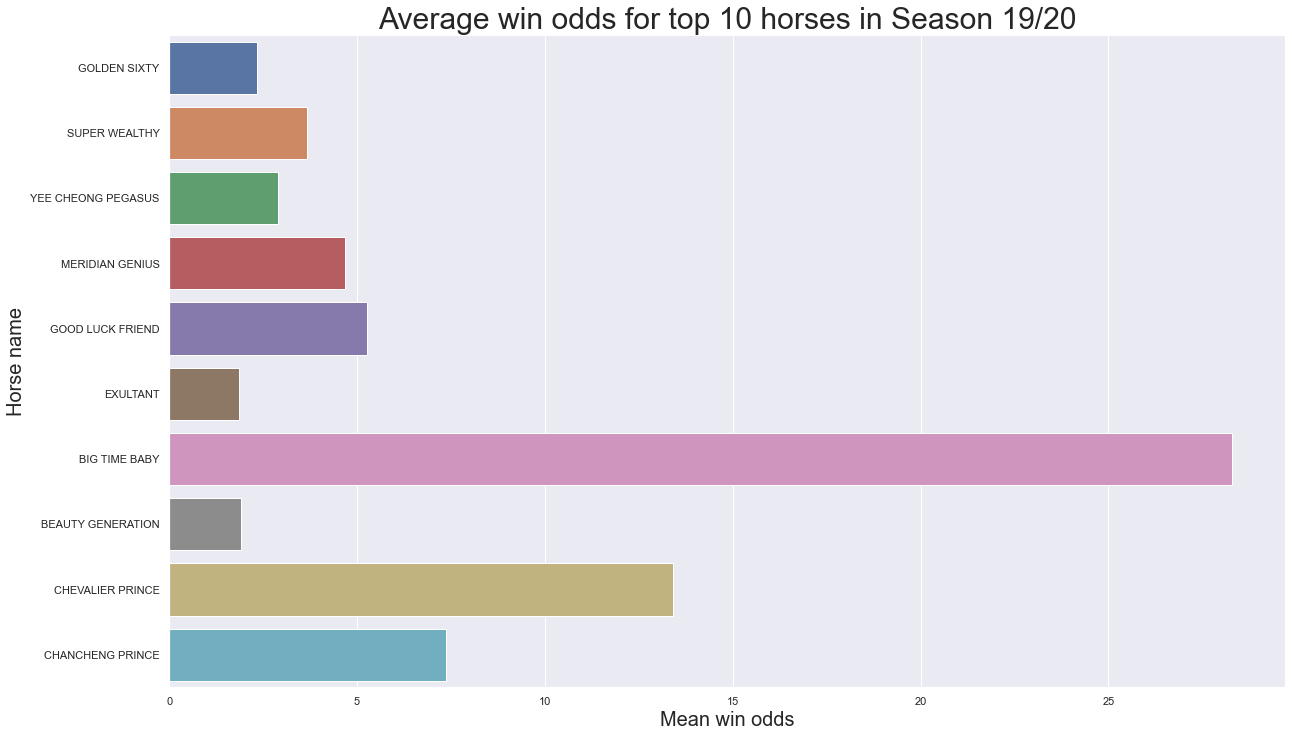

In [9]:
mpl.rcParams['figure.figsize'] = [20, 12] 
hb=sns.barplot(x='win_odds',y='horse',data=place_top_10)
hb.axes.set_title("Average win odds for top 10 horses in Season 19/20",fontsize=30)
hb.set_xlabel("Mean win odds",fontsize=20)
hb.set_ylabel("Horse name",fontsize=20)

### Horses have highest win odds with decent win rate

In [10]:
wo_top_10=top_horses.sort_values('win_odds',ascending=False)[:10]
wo_top_10

,horse_id,horse,win_odds,place,num_of_race
56,A157,BIG TIME BABY,28.285714,1.857143,7
868,C470,MIGHTY GIANT,20.600000,2.714286,7
1058,D133,SEATTLE CHOICE,16.260000,3.000000,5
1199,D298,CHEVALIER PRINCE,13.400000,2.000000,4
76,A207,FANTASTIC SHOW,12.100000,2.583333,12
657,C229,SHINING ACE,11.413333,2.933333,15
751,C333,HONG KONG WIN,10.090000,2.600000,10
408,B391,LAKESHORE EAGLE,8.800000,2.875000,8
880,C483,WAR OF COURAGE,8.388889,2.333333,9
658,C231,BALLISTIC KING,7.930000,3.000000,10


Text(0, 0.5, 'Horse name')

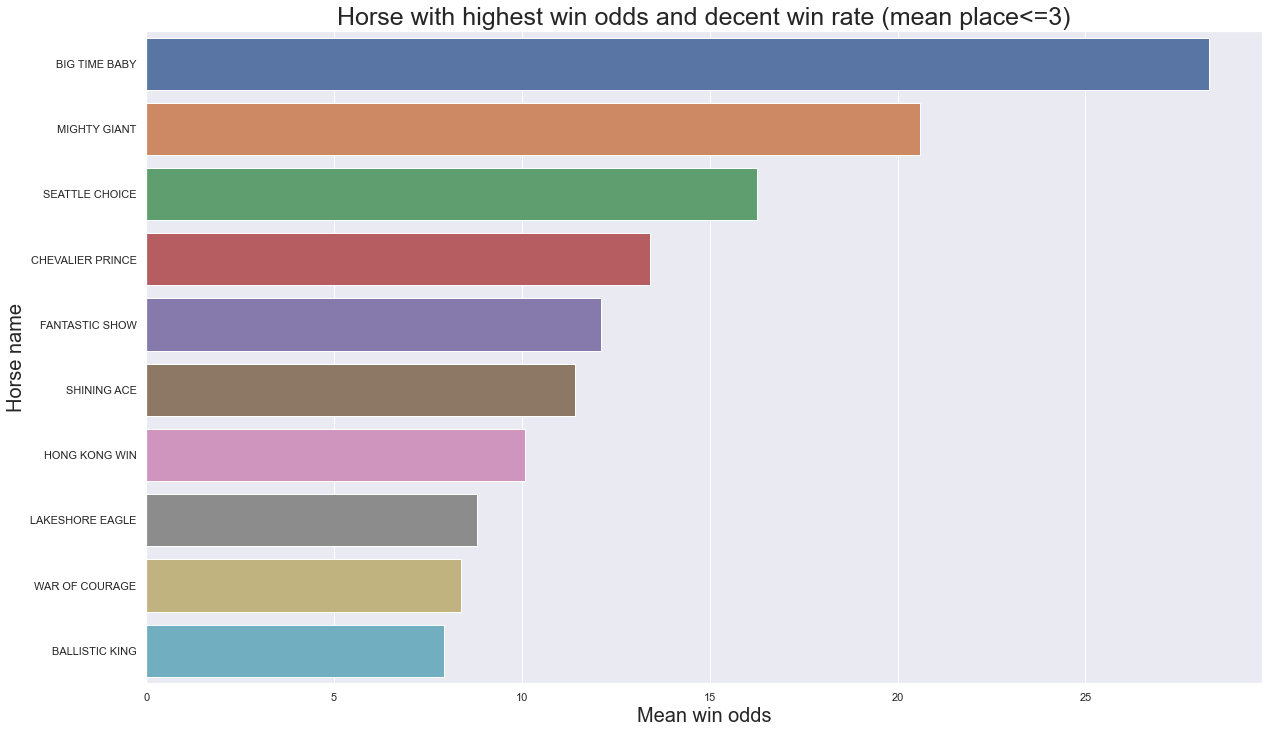

In [11]:
mpl.rcParams['figure.figsize'] = [20, 12] 
hb2=sns.barplot(x='win_odds',y='horse',data=wo_top_10)
hb2.axes.set_title("Horse with highest win odds and decent win rate (mean place<=3)",fontsize=25)
hb2.set_xlabel("Mean win odds",fontsize=20)
hb2.set_ylabel("Horse name",fontsize=20)

### Prize you can win by beting the most popular choice

In [12]:
top_pick=df_full.loc[df_full.groupby('race_id')['win_odds'].idxmin()]
top_pick

,race_id,race,date,place,horse_id,horse_no,horse,jockey,trainer,actual_weight,...,location,distance_m,finish_time,finish_time_s,country_of_origin,age,h_stakes_wins,1-2-3-starts,t_stakes_won,j_stakes_won
0,1,1,2019-09-01,1,C127,3,GOOD RUNNERS WAY,Z Purton,C S Shum,131.0,...,Sha Tin,1600,1900-01-01 00:01:35.480,95.48,NZ,6.0,1388520.0,"['2', '1', '2', '22']","$69,711,815","$202,112,646"
12,2,2,2019-09-01,4,A277,14,LEISURED FEET,J Moreira,W Y So,116.0,...,Sha Tin,1200,1900-01-01 00:01:10.490,70.49,NZ,NaN,1772475.0,"['2', '3', '1', '26']","$35,330,615","$206,911,366"
23,3,3,2019-09-01,1,B348,5,REGENCY LEGEND,Z Purton,C S Shum,120.0,...,Sha Tin,1200,1900-01-01 00:01:08.740,68.74,NZ,5.0,6105600.0,"['4', '0', '0', '7']","$69,711,815","$202,112,646"
32,4,4,2019-09-01,3,B164,2,FALCON TURBO,C Y Ho,D J Whyte,132.0,...,Sha Tin,1200,1900-01-01 00:01:09.700,69.70,AUS,6.0,3403135.0,"['3', '2', '3', '24']","$51,039,432","$126,366,677"
50,5,5,2019-09-01,7,C008,13,MR MAGELLAN,K Teetan,Y S Tsui,116.0,...,Sha Tin,1400,1900-01-01 00:01:22.710,82.71,AUS,NaN,697450.0,"['0', '1', '4', '14']","$44,017,535","$138,503,489"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10148,824,5,2020-07-15,1,D297,6,KINDA COOL,Z Purton,F C Lor,128.0,...,Happy Valley,1200,1900-01-01 00:01:09.970,69.97,NZ,4.0,933155.0,"['1', '1', '1', '4']","$79,179,208","$202,112,646"
10160,825,6,2020-07-15,2,D147,2,CALIFORNIA RAD,K Teetan,A S Cruz,132.0,...,Happy Valley,1200,1900-01-01 00:01:09.330,69.33,AUS,4.0,4166185.0,"['4', '3', '2', '13']","$127,705,341","$138,503,489"
10172,826,7,2020-07-15,2,B102,3,ALPHA HEDGE,Z Purton,K W Lui,130.0,...,Happy Valley,1650,1900-01-01 00:01:40.160,100.16,IRE,6.0,4514340.0,"['4', '5', '3', '24']","$101,536,068","$202,112,646"
10187,827,8,2020-07-15,5,B163,4,STAR SHINE,Z Purton,K W Lui,126.0,...,Happy Valley,1650,1900-01-01 00:01:39.010,99.01,AUS,7.0,6214700.0,"['4', '1', '4', '21']","$101,536,068","$202,112,646"


In [13]:
wins=top_pick[top_pick['place']==1][['date','horse','place','win_odds']]
wins

,date,horse,place,win_odds
0,2019-09-01,GOOD RUNNERS WAY,1,2.2
23,2019-09-01,REGENCY LEGEND,1,1.6
105,2019-09-01,CORDYCEPS,1,3.5
119,2019-09-08,FORTUNE HAPPINESS,1,2.9
152,2019-09-08,BIG FORTUNE,1,3.4
...,...,...,...,...
9824,2020-07-05,AWE,1,4.1
9944,2020-07-08,GOLDEN SPECTRUM,1,3.8
9956,2020-07-12,KELMIMI WINS,1,3.0
10020,2020-07-12,SKY FIELD,1,1.4


In [14]:
prize_get=sum(wins['win_odds']*10)
prize_get

6458.0

In [15]:
bet=819*10
bet

8190

In [16]:
result=prize_get-bet
result

-1732.0

In [17]:
win_rate=wins.shape[0]/top_pick.shape[0]
win_rate

0.2922705314009662

### Prize per day gained by betting win on the most propular horse

In [18]:
top_pick['race']=top_pick['race'].astype(int)
s_num_of_race=top_pick.groupby('date')[['race']].max()
s_num_of_race

,race
date,
2019-09-01,10
2019-09-08,10
2019-09-11,8
2019-09-15,10
2019-09-21,10
...,...
2020-07-01,10
2020-07-05,11
2020-07-08,9


In [19]:
def prize_from_win(series):
    return sum(series*10)

In [20]:
prize_over_time=wins.groupby('date')[['win_odds']].agg(prize_from_win)
prize_over_time

,win_odds
date,
2019-09-01,73.0
2019-09-08,63.0
2019-09-11,53.0
2019-09-15,103.0
2019-09-21,34.0
...,...
2020-07-01,92.0
2020-07-05,149.0
2020-07-08,38.0


In [21]:
prize_over_time=prize_over_time.join(s_num_of_race)
prize_over_time['gain_per_day']=prize_over_time['win_odds']-prize_over_time['race']*10
prize_over_time

,win_odds,race,gain_per_day
date,,,
2019-09-01,73.0,10,-27.0
2019-09-08,63.0,10,-37.0
2019-09-11,53.0,8,-27.0
2019-09-15,103.0,10,3.0
2019-09-21,34.0,10,-66.0
...,...,...,...
2020-07-01,92.0,10,-8.0
2020-07-05,149.0,11,39.0
2020-07-08,38.0,9,-52.0


Text(0, 0.5, 'Prize gain per race day')

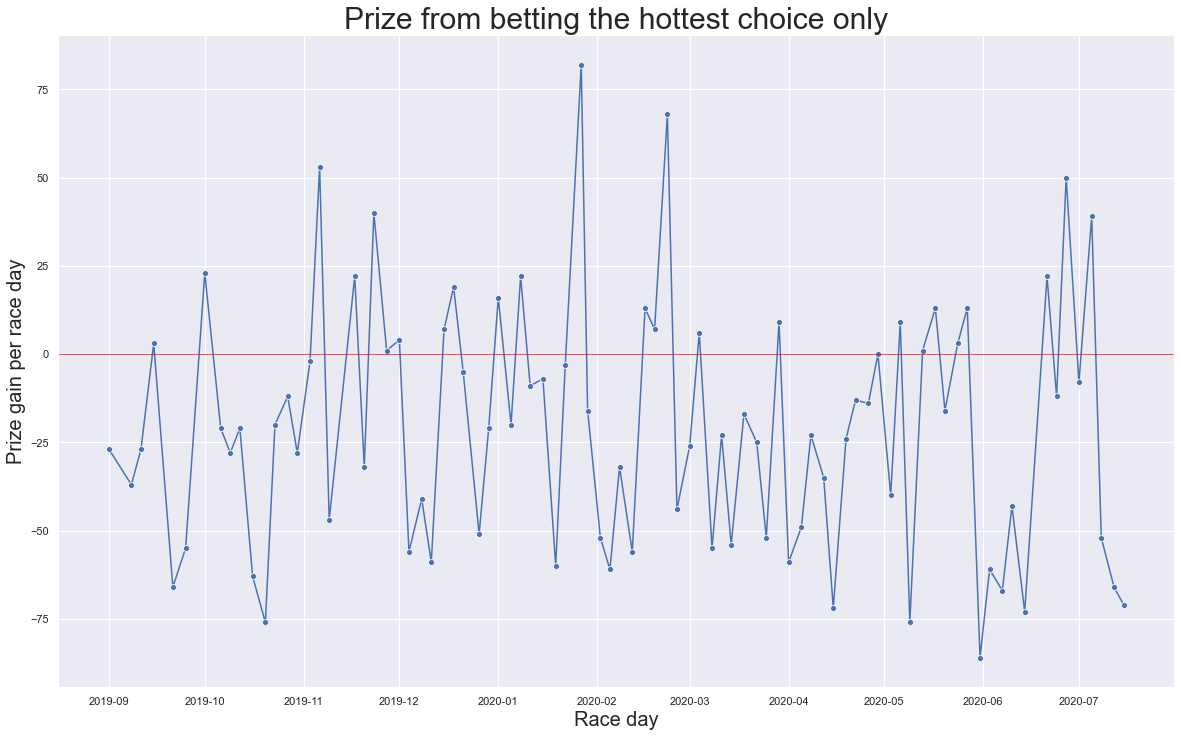

In [22]:
linechart=sns.lineplot(x=prize_over_time.index,y='gain_per_day',palette=["red"],data=prize_over_time,marker='o')
linechart.axhline(y = 0, color='red', linewidth=1, alpha=.7)
linechart.set_title('Prize from betting the hottest choice only',fontsize=30)
linechart.set_xlabel("Race day",fontsize=20)
linechart.set_ylabel("Prize gain per race day",fontsize=20)

In [23]:
prize_over_time

,win_odds,race,gain_per_day
date,,,
2019-09-01,73.0,10,-27.0
2019-09-08,63.0,10,-37.0
2019-09-11,53.0,8,-27.0
2019-09-15,103.0,10,3.0
2019-09-21,34.0,10,-66.0
...,...,...,...
2020-07-01,92.0,10,-8.0
2020-07-05,149.0,11,39.0
2020-07-08,38.0,9,-52.0


In [24]:
prize_over_time.sum()

win_odds        6458.0
race             828.0
gain_per_day   -1822.0
dtype: float64

### Prize per day gained by betting win on the most propular horse

In [25]:
least_pick=df_full.loc[df_full.groupby('race_id')['win_odds'].idxmax()]
least_pick

,race_id,race,date,place,horse_id,horse_no,horse,jockey,trainer,actual_weight,...,location,distance_m,finish_time,finish_time_s,country_of_origin,age,h_stakes_wins,1-2-3-starts,t_stakes_won,j_stakes_won
6,1,1,2019-09-01,7,B425,5,WICKER,N Callan,R Gibson,126.0,...,Sha Tin,1600,1900-01-01 00:01:35.790,95.79,NZ,5.0,619875.0,"['1', '0', '0', '19']","$26,344,954","$42,185,220"
17,2,2,2019-09-01,9,C251,10,SKY GEM,A Sanna,C Fownes,129.0,...,Sha Tin,1200,1900-01-01 00:01:10.720,70.72,NZ,5.0,1303775.0,"['2', '0', '4', '24']","$78,621,958","$10,735,300"
25,3,3,2019-09-01,3,V077,6,JOLLY BANNER,M F Poon,P F Yiu,115.0,...,Sha Tin,1200,1900-01-01 00:01:09.150,69.15,AUS,9.0,14871450.0,"['7', '6', '10', '42']","$76,092,793","$39,061,505"
40,4,4,2019-09-01,11,C168,12,BREAK RECORD,H W Lai,C S Shum,121.0,...,Sha Tin,1200,1900-01-01 00:01:10.150,70.15,AUS,5.0,413250.0,"['1', '0', '0', '12']","$69,711,815","$7,514,865"
56,5,5,2019-09-01,13,A092,14,ROMAN ODYSSEY,T H So,K L Man,114.0,...,Sha Tin,1400,1900-01-01 00:01:23.550,83.55,AUS,9.0,1745950.0,"['1', '3', '5', '31']","$43,374,438","$8,847,788"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10156,824,5,2020-07-15,9,D189,4,STAY CHILL,M L Yeung,W Y So,132.0,...,Happy Valley,1200,1900-01-01 00:01:11.110,71.11,IRE,4.0,0.0,"['0', '0', '0', '8']","$35,330,615","$16,150,280"
10167,825,6,2020-07-15,9,C368,10,LONDON LUCKYSTAR,H W Lai,D E Ferraris,118.0,...,Happy Valley,1200,1900-01-01 00:01:09.990,69.99,IRE,4.0,406000.0,"['0', '1', '0', '10']","$29,619,618","$7,514,865"
10176,826,7,2020-07-15,6,C142,9,FENRIR,M L Yeung,K H Ting,117.0,...,Happy Valley,1650,1900-01-01 00:01:40.590,100.59,GB,NaN,0.0,"['0', '0', '0', '6']","$36,788,993","$16,150,280"
10188,827,8,2020-07-15,6,B112,9,EASY GO EASY WIN,V Borges,D J Whyte,116.0,...,Happy Valley,1650,1900-01-01 00:01:39.060,99.06,NZ,6.0,3743350.0,"['2', '4', '1', '29']","$51,039,432","$21,600,335"


In [26]:
least_pick[['race_id','date','place','win_odds']]

,race_id,date,place,win_odds
6,1,2019-09-01,7,50.0
17,2,2019-09-01,9,86.0
25,3,2019-09-01,3,50.0
40,4,2019-09-01,11,238.0
56,5,2019-09-01,13,127.0
...,...,...,...,...
10156,824,2020-07-15,9,165.0
10167,825,2020-07-15,9,86.0
10176,826,2020-07-15,6,56.0
10188,827,2020-07-15,6,30.0


In [27]:
wins_least_pick=least_pick[least_pick['place']==1][['date','horse','place','win_odds']]
wins_least_pick

,date,horse,place,win_odds
1002,2019-10-09,HAPPY DRAGON,1,29.0
7680,2020-05-03,LIKE THAT,1,4.9
8782,2020-06-03,TOP MILITARY,1,284.0


In [28]:
prize_yolo=wins_least_pick['win_odds'].agg(prize_from_win)
prize_yolo

3179.0

In [29]:
result_yolo=prize_yolo-bet
result_yolo

-5011.0

### Correlation between jockeys & trainers combination ,win odds and place

Text(156.5, 0.5, 'Jockeys')

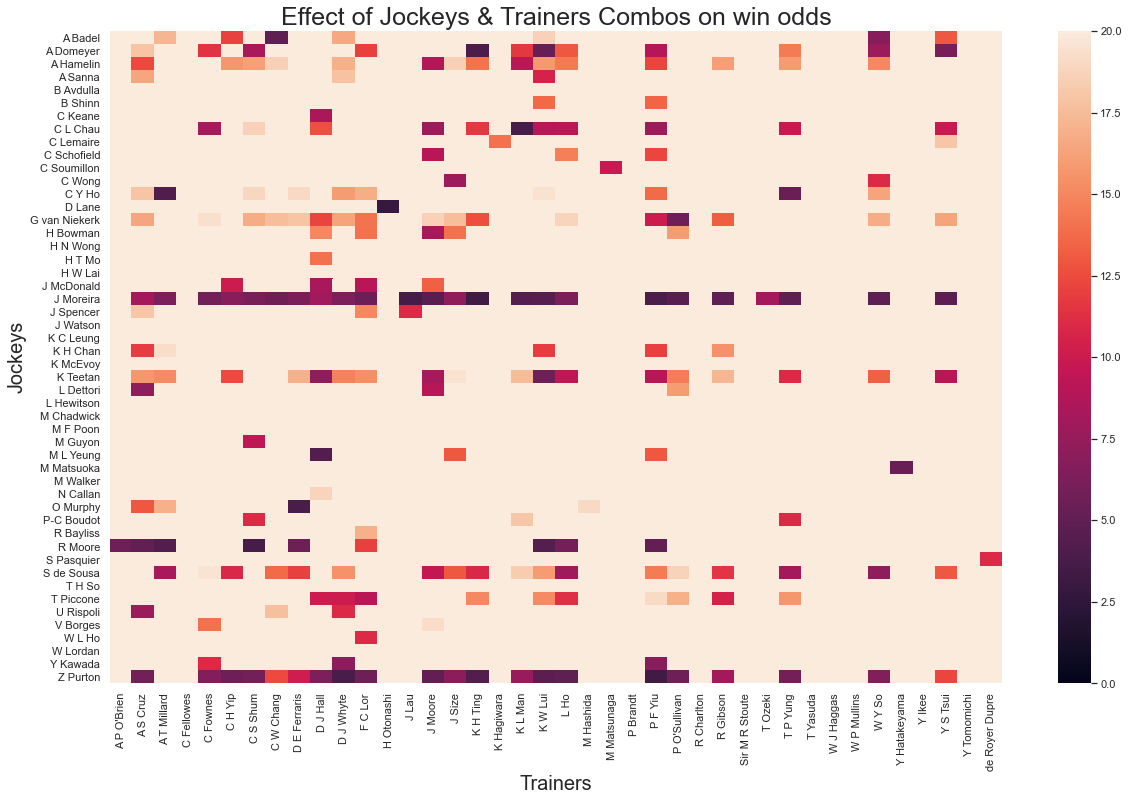

In [30]:
hm=df_full.pivot_table(index='jockey',columns='trainer',values='win_odds',aggfunc=np.mean)
hm=hm.fillna(999)
ax=sns.heatmap(hm,vmin=0, vmax=20)
ax.set_title('Effect of Jockeys & Trainers Combos on win odds',fontsize=25)
ax.set_xlabel('Trainers',fontsize=20)
ax.set_ylabel('Jockeys',fontsize=20)

Text(156.5, 0.5, 'Jockeys')

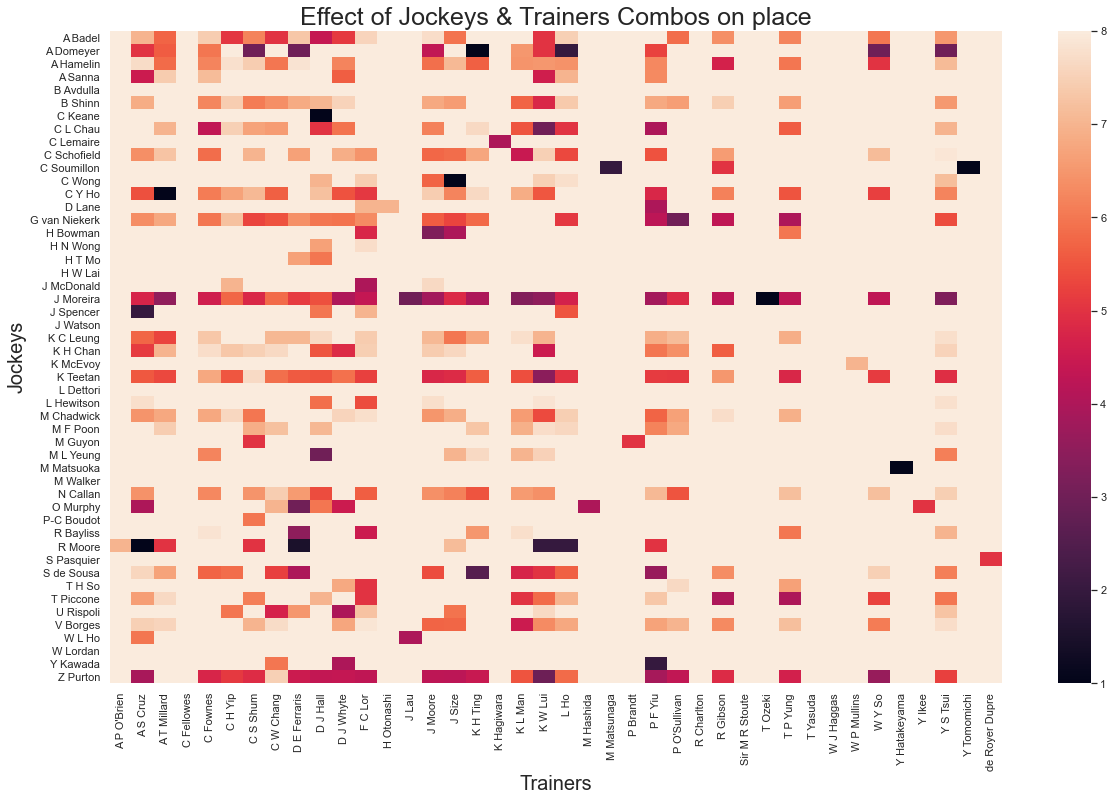

In [31]:
hm2=df_full.pivot_table(index='jockey',columns='trainer',values='place',aggfunc=np.mean)
hm2=hm2.fillna(999)
ax=sns.heatmap(hm2,vmin=1, vmax=8)
ax.set_title('Effect of Jockeys & Trainers Combos on place',fontsize=25)
ax.set_xlabel('Trainers',fontsize=20)
ax.set_ylabel('Jockeys',fontsize=20)

In [32]:
cor=df_full.corr()

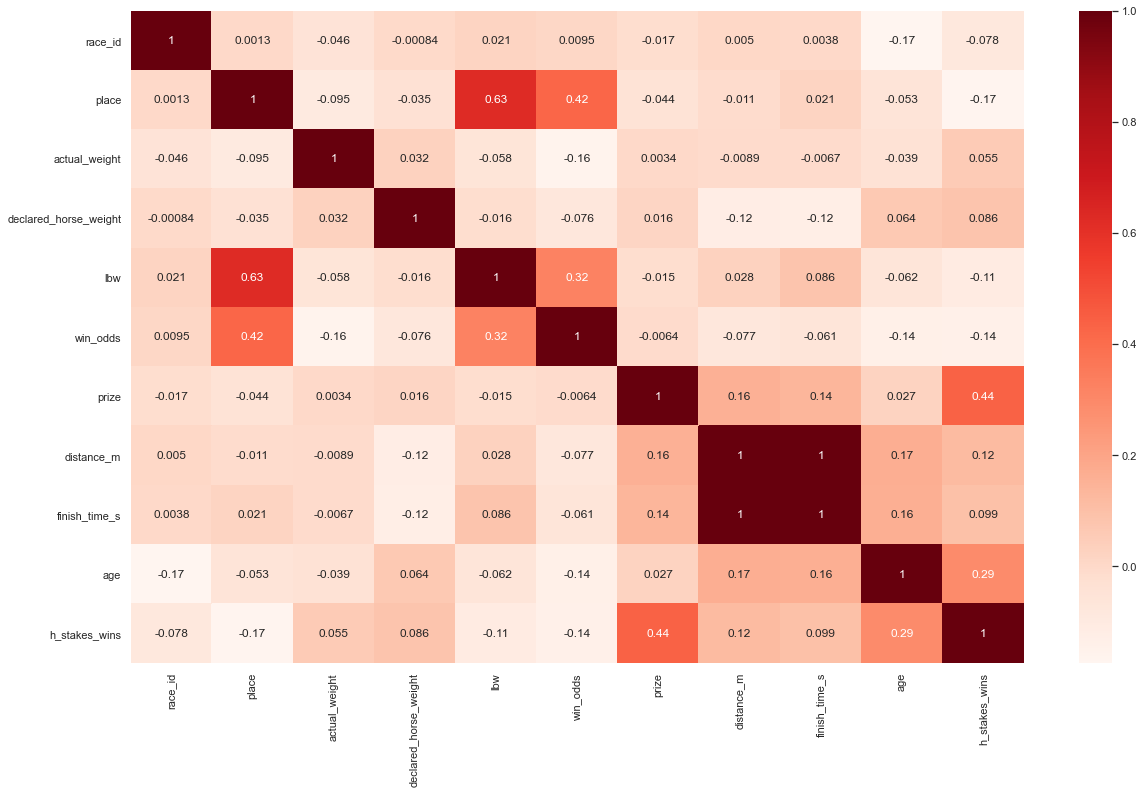

In [33]:
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [43]:
jockey_stats=df_full.groupby('jockey')['place'].value_counts()
jockey_stats=jockey_stats.unstack(level=-1)
jockey_stats=jockey_stats.fillna(0)
jockey_stats['total']=jockey_stats.sum(axis=1)
jockey_stats=jockey_stats.sort_values([1,2,3,4,5],ascending=False)
jockey_stats=jockey_stats[[1,2,3,4,5,'total']]
jockey_stats

place,1,2,3,4,5,total
jockey,,,,,,
Z Purton,147.0,101.0,100.0,56.0,66.0,706.0
J Moreira,138.0,123.0,91.0,68.0,66.0,718.0
K Teetan,93.0,75.0,81.0,81.0,72.0,719.0
C Y Ho,67.0,60.0,58.0,62.0,71.0,623.0
C Schofield,43.0,40.0,40.0,41.0,48.0,490.0
G van Niekerk,37.0,44.0,40.0,40.0,30.0,350.0
M F Poon,29.0,23.0,36.0,47.0,50.0,553.0
K C Leung,29.0,21.0,36.0,50.0,54.0,559.0
N Callan,26.0,40.0,40.0,58.0,44.0,480.0


In [44]:
jockey_stats.shape

(50, 6)

In [35]:
jockey_stats['sum_of_top3']=jockey_stats[[1,2,3]].sum(axis=1)
jockey_stats

place,1,2,3,4,5,total,sum_of_top3
jockey,,,,,,,
Z Purton,147.0,101.0,100.0,56.0,66.0,706.0,348.0
J Moreira,138.0,123.0,91.0,68.0,66.0,718.0,352.0
K Teetan,93.0,75.0,81.0,81.0,72.0,719.0,249.0
C Y Ho,67.0,60.0,58.0,62.0,71.0,623.0,185.0
C Schofield,43.0,40.0,40.0,41.0,48.0,490.0,123.0
G van Niekerk,37.0,44.0,40.0,40.0,30.0,350.0,121.0
M F Poon,29.0,23.0,36.0,47.0,50.0,553.0,88.0
K C Leung,29.0,21.0,36.0,50.0,54.0,559.0,86.0
N Callan,26.0,40.0,40.0,58.0,44.0,480.0,106.0


In [36]:
jockey_stats['sum_of_top3'].sum()

2490.0

In [37]:
main_jockey_stats=jockey_stats[:10].copy()
main_jockey_stats=main_jockey_stats[['sum_of_top3']]

new_row = pd.DataFrame(data = {
    'sum_of_top3' : [jockey_stats['sum_of_top3'][10:].sum()]
}, index=['others'])

main_jockey_stats=pd.concat([main_jockey_stats, new_row])
main_jockey_stats

place,sum_of_top3
Z Purton,348.0
J Moreira,352.0
K Teetan,249.0
C Y Ho,185.0
C Schofield,123.0
G van Niekerk,121.0
M F Poon,88.0
K C Leung,86.0
N Callan,106.0
A Badel,70.0


<ipython-input-42-4824381da0d4>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


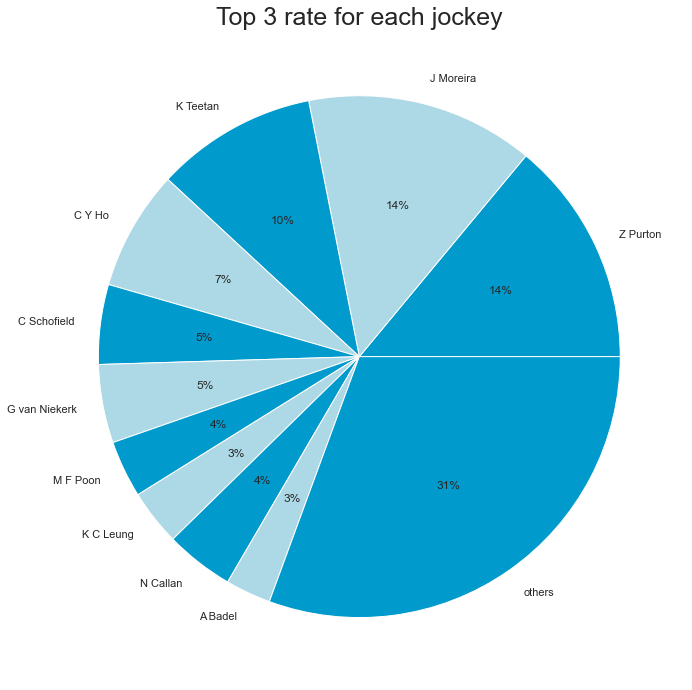

In [42]:
fig, ax = plt.subplots()

color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', 
                      '#C1F0F6', '#0099CC']


ax.pie(main_jockey_stats['sum_of_top3'], labels=main_jockey_stats.index,  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,labeldistance=1.1)
ax.set_title('Top 3 rate for each jockey',fontsize=25)

fig.show()

In [39]:
trainer_stats=df_full.groupby('trainer')['place'].value_counts()
trainer_stats=trainer_stats.unstack(level=-1)
trainer_stats=trainer_stats.fillna(0)
trainer_stats['total']=trainer_stats.sum(axis=1)
trainer_stats=trainer_stats.sort_values([1,2,3,4,5],ascending=False)
trainer_stats=trainer_stats[[1,2,3,4,5,'total']]
trainer_stats

place,1,2,3,4,5,total
trainer,,,,,,
P F Yiu,67.0,43.0,44.0,44.0,45.0,478.0
A S Cruz,65.0,55.0,62.0,44.0,66.0,598.0
K W Lui,63.0,50.0,52.0,32.0,59.0,487.0
J Moore,57.0,55.0,63.0,54.0,36.0,566.0
C Fownes,49.0,54.0,41.0,51.0,45.0,527.0
J Size,46.0,73.0,51.0,49.0,45.0,542.0
C S Shum,45.0,49.0,26.0,39.0,43.0,474.0
F C Lor,44.0,42.0,55.0,55.0,43.0,498.0
D J Whyte,44.0,41.0,38.0,47.0,40.0,465.0


In [40]:
df_full[(df_full['jockey']=='Z Purton')&(df_full['place']==1)]

,race_id,race,date,place,horse_id,horse_no,horse,jockey,trainer,actual_weight,...,location,distance_m,finish_time,finish_time_s,country_of_origin,age,h_stakes_wins,1-2-3-starts,t_stakes_won,j_stakes_won
0,1,1,2019-09-01,1,C127,3,GOOD RUNNERS WAY,Z Purton,C S Shum,131.0,...,Sha Tin,1600,1900-01-01 00:01:35.480,95.48,NZ,6.0,1388520.0,"['2', '1', '2', '22']","$69,711,815","$202,112,646"
23,3,3,2019-09-01,1,B348,5,REGENCY LEGEND,Z Purton,C S Shum,120.0,...,Sha Tin,1200,1900-01-01 00:01:08.740,68.74,NZ,5.0,6105600.0,"['4', '0', '0', '7']","$69,711,815","$202,112,646"
190,17,7,2019-09-08,1,C037,8,INVINCIBLE MISSILE,Z Purton,W Y So,123.0,...,Sha Tin,1200,1900-01-01 00:01:08.600,68.60,AUS,5.0,4107300.0,"['3', '5', '2', '19']","$35,330,615","$202,112,646"
225,20,10,2019-09-08,1,B264,8,COOL TEAM,Z Purton,P O'Sullivan,123.0,...,Sha Tin,1400,1900-01-01 00:01:21.190,81.19,IRE,NaN,1282350.0,"['1', '0', '1', '12']","$33,010,792","$202,112,646"
327,29,1,2019-09-15,1,V378,3,CROWN AVENUE,Z Purton,C H Yip,126.0,...,Sha Tin,1800,1900-01-01 00:01:46.540,106.54,AUS,8.0,4534855.0,"['6', '3', '4', '52']","$26,783,461","$202,112,646"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,808,9,2020-07-08,1,D188,1,GOLDEN SPECTRUM,Z Purton,A S Cruz,131.0,...,Happy Valley,1800,1900-01-01 00:01:49.200,109.20,GB,4.0,1210750.0,"['1', '0', '2', '9']","$127,705,341","$202,112,646"
9998,812,4,2020-07-12,1,A165,2,FAST MOST FURIOUS,Z Purton,D J Hall,130.0,...,Sha Tin,1600,1900-01-01 00:01:34.280,94.28,IRE,7.0,9964700.0,"['5', '5', '5', '29']","$37,040,533","$202,112,646"
10047,816,8,2020-07-12,1,C323,5,MR ALDAN,Z Purton,A S Cruz,126.0,...,Sha Tin,1600,1900-01-01 00:01:33.270,93.27,AUS,5.0,1972000.0,"['2', '1', '0', '15']","$127,705,341","$202,112,646"
10112,821,2,2020-07-15,1,C361,4,OVERSUBSCRIBED,Z Purton,D J Hall,131.0,...,Happy Valley,1000,1900-01-01 00:00:57.270,57.27,AUS,5.0,814555.0,"['1', '0', '3', '14']","$37,040,533","$202,112,646"


In [41]:
df_full[(df_full['jockey']=='Z Purton')]

,race_id,race,date,place,horse_id,horse_no,horse,jockey,trainer,actual_weight,...,location,distance_m,finish_time,finish_time_s,country_of_origin,age,h_stakes_wins,1-2-3-starts,t_stakes_won,j_stakes_won
0,1,1,2019-09-01,1,C127,3,GOOD RUNNERS WAY,Z Purton,C S Shum,131.0,...,Sha Tin,1600,1900-01-01 00:01:35.480,95.48,NZ,6.0,1388520.0,"['2', '1', '2', '22']","$69,711,815","$202,112,646"
13,2,2,2019-09-01,5,T140,7,NEVER BETTER,Z Purton,P O'Sullivan,131.0,...,Sha Tin,1200,1900-01-01 00:01:10.500,70.50,NZ,NaN,3761275.0,"['2', '10', '8', '53']","$33,010,792","$202,112,646"
23,3,3,2019-09-01,1,B348,5,REGENCY LEGEND,Z Purton,C S Shum,120.0,...,Sha Tin,1200,1900-01-01 00:01:08.740,68.74,NZ,5.0,6105600.0,"['4', '0', '0', '7']","$69,711,815","$202,112,646"
34,4,4,2019-09-01,5,V357,5,TOP SCORE,Z Purton,K W Lui,130.0,...,Sha Tin,1200,1900-01-01 00:01:09.780,69.78,AUS,8.0,4445855.0,"['4', '3', '4', '43']","$101,536,068","$202,112,646"
59,6,6,2019-09-01,2,C180,1,DANCING FIGHTER,Z Purton,C Fownes,132.0,...,Sha Tin,1000,1900-01-01 00:00:57.790,57.79,AUS,5.0,3078290.0,"['3', '3', '1', '8']","$78,621,958","$202,112,646"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10148,824,5,2020-07-15,1,D297,6,KINDA COOL,Z Purton,F C Lor,128.0,...,Happy Valley,1200,1900-01-01 00:01:09.970,69.97,NZ,4.0,933155.0,"['1', '1', '1', '4']","$79,179,208","$202,112,646"
10161,825,6,2020-07-15,3,C511,6,HIGH RISE SOLDIER,Z Purton,K W Lui,125.0,...,Happy Valley,1200,1900-01-01 00:01:09.450,69.45,AUS,5.0,1138250.0,"['0', '2', '3', '10']","$101,536,068","$202,112,646"
10172,826,7,2020-07-15,2,B102,3,ALPHA HEDGE,Z Purton,K W Lui,130.0,...,Happy Valley,1650,1900-01-01 00:01:40.160,100.16,IRE,6.0,4514340.0,"['4', '5', '3', '24']","$101,536,068","$202,112,646"
10187,827,8,2020-07-15,5,B163,4,STAR SHINE,Z Purton,K W Lui,126.0,...,Happy Valley,1650,1900-01-01 00:01:39.010,99.01,AUS,7.0,6214700.0,"['4', '1', '4', '21']","$101,536,068","$202,112,646"
